<a href="https://colab.research.google.com/github/Jit562/Netflix_Tv_Movie_Cluster/blob/main/TV_%26_Movies_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import euclidean_distances

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2829,s2830,Movie,Hotel Transylvania 3: Summer Vacation,Genndy Tartakovsky,"Adam Sandler, Selena Gomez, Kevin James, Kathr...",United States,"January 24, 2019",2018,PG,97 min,"Children & Family Movies, Comedies",It's love at first sight for Dracula when he m...
7604,s7605,Movie,Whitney Cummings: Money Shot,John Fortenberry,Whitney Cummings,United States,"January 1, 2019",2010,TV-MA,48 min,Stand-Up Comedy,Comedy Central roast veteran Whitney Cummings ...
669,s670,TV Show,Baby Ballroom,NaN,"Warren Bullock, Jane Bullock",United Kingdom,"July 10, 2018",2018,TV-MA,2 Seasons,"British TV Shows, International TV Shows, Real...",Step into the cutthroat world of kids' ballroo...
6188,s6189,TV Show,The Business of Drugs,NaN,Amaryllis Fox,United States,"July 14, 2020",2020,TV-MA,1 Season,Docuseries,To understand the origins and true impact of t...
1715,s1716,Movie,Desolation,Sam Patton,"Jaimi Paige, Alyshia Ochse, Toby Nichols, Clau...",United States,"May 8, 2018",2017,TV-MA,76 min,"Horror Movies, Thrillers","Along with her son and best friend, a grieving..."


In [ ]:
df.shape

(7787, 12)

In [ ]:
for col in df.columns:
  print(col)

show_id
type
title
director
cast
country
date_added
release_year
rating
duration
listed_in
description


In [ ]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    print('missing values : ',col, ':', df[col].isnull().sum(), ' and percentage values : ', round(df[col].isnull().sum()/df.shape[0]*100, 2))

missing values :  director : 2389  and percentage values :  30.68
missing values :  cast : 718  and percentage values :  9.22
missing values :  country : 507  and percentage values :  6.51
missing values :  date_added : 10  and percentage values :  0.13
missing values :  rating : 7  and percentage values :  0.09


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [ ]:
for col in df.columns:
  print(col, ':', df[col].isnull().sum())

show_id : 0
type : 0
title : 0
director : 0
cast : 0
country : 0
date_added : 0
release_year : 0
rating : 0
duration : 0
listed_in : 0
description : 0


In [ ]:
df = df[df['cast'] != 'Unknown']
df = df[df['date_added'] != 'Unknown']

In [ ]:
df[df['date_added'] == 'Unknown']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
df.shape

(7059, 12)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4979 entries, 1 to 7783
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4979 non-null   object
 1   type          4979 non-null   object
 2   title         4979 non-null   object
 3   director      4979 non-null   object
 4   cast          4979 non-null   object
 5   country       4979 non-null   object
 6   date_added    4979 non-null   object
 7   release_year  4979 non-null   int64 
 8   rating        4979 non-null   object
 9   duration      4979 non-null   object
 10  listed_in     4979 non-null   object
 11  description   4979 non-null   object
dtypes: int64(1), object(11)
memory usage: 505.7+ KB


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [ ]:
# Step 1: Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date'] = df['date_added'].dt.strftime('%m-%d-%y')

In [ ]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day
df['dayofweek'] = df['date_added'].dt.dayofweek


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,year,month,day,dayofweek
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,08-14-20,2020.0,8.0,14.0,4.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12-23-16,2016.0,12.0,23.0,4.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12-20-18,2018.0,12.0,20.0,3.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11-16-17,2017.0,11.0,16.0,3.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,01-01-20,2020.0,1.0,1.0,2.0


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['years'] = df['date'].dt.year
df['months'] = df['date'].dt.month_name()
df['days'] = df['date'].dt.day_name()

In [ ]:
df.drop(columns=['year','month','day','dayofweek','date','date_added'], inplace=True, axis=1)

In [ ]:
df.drop('release_year', inplace=True, axis=1)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,rating,duration,listed_in,description,years,months,days
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,August,Friday
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,December,Friday
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,December,Thursday
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,November,Thursday
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,January,Wednesday


In [ ]:
direc = df[df['director'] != 'Unknown']

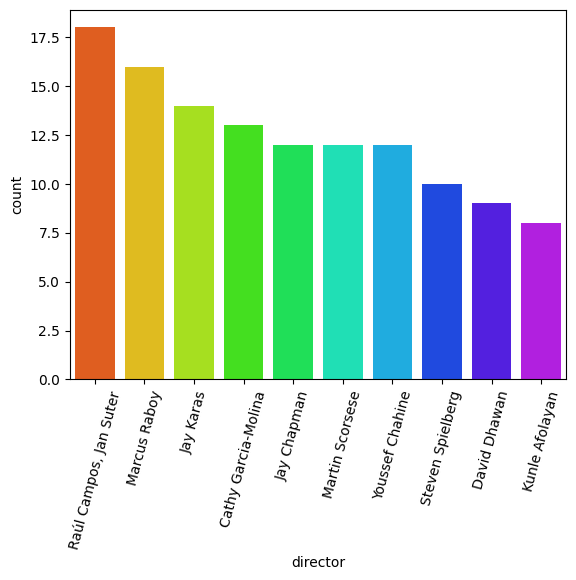

In [ ]:
sns.countplot(x='director', data=direc, order = direc['director'].value_counts().iloc[:10].index, palette="gist_rainbow")
plt.xticks(rotation=75)
plt.show()

In [ ]:
# find the top 10 cast name
cast = df[df['cast'] != 'Unknown']
cast['cast'] = cast['cast'].str.split(',')
cast = cast.explode('cast')
cast['cast'].value_counts().head(10)

,count
cast,
Anupam Kher,38
Takahiro Sakurai,28
Shah Rukh Khan,27
Om Puri,27
Boman Irani,25
Andrea Libman,24
Paresh Rawal,24
Yuki Kaji,23
Akshay Kumar,22


In [ ]:
country = df.groupby(['country','type'])['country'].count().unstack()

country.sort_values(by=['Movie','TV Show'] , ascending=False).head(12)


type,Movie,TV Show
country,,
United States,1856.0,799.0
India,837.0,57.0
United Kingdom,163.0,168.0
Canada,106.0,53.0
Egypt,88.0,12.0
Spain,77.0,40.0
Turkey,73.0,27.0
Philippines,70.0,1.0
Japan,67.0,154.0


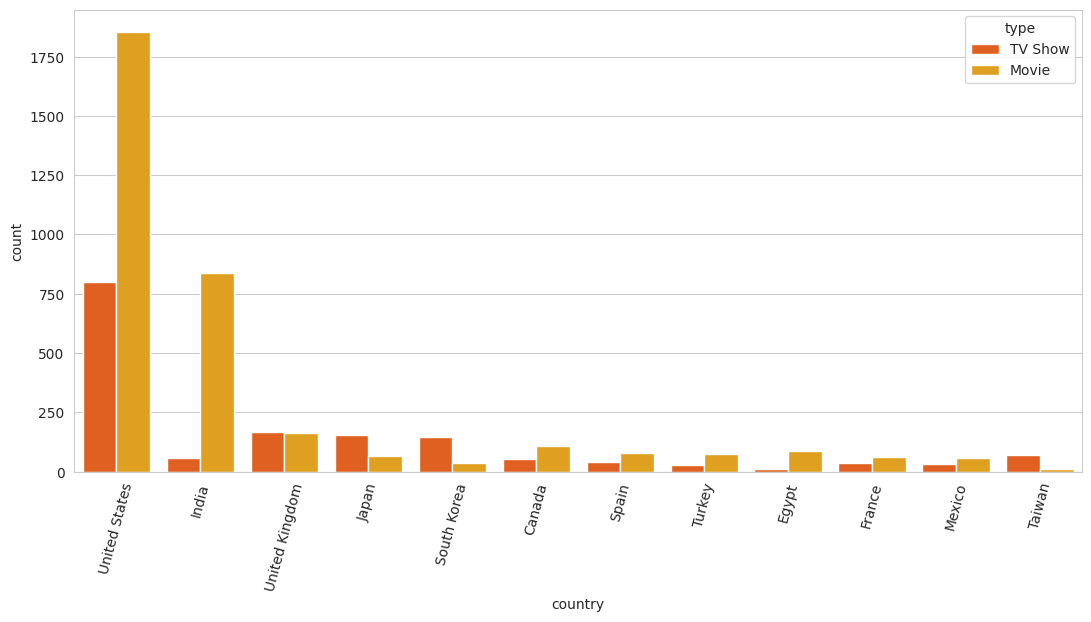

In [ ]:
figsize = (13,6)
plt.figure(figsize=figsize)
sns.set_style("whitegrid")
sns.countplot(x='country', data=df, order = df['country'].value_counts().index[0:12], palette="autumn", hue=df['type'])
plt.xticks(rotation=75)
plt.show()

In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,2584
TV-14,1755
TV-PG,674
R,657
PG-13,378
TV-Y7,251
TV-Y,244
PG,241
TV-G,159


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating',
       'duration', 'listed_in', 'description', 'years', 'months', 'days'],
      dtype='object')

In [ ]:
df['years'].value_counts()

,count
years,
2019.0,1962
2020.0,1841
2018.0,1509
2017.0,1059
2016.0,381
2021.0,109
2015.0,68
2014.0,20
2011.0,13


In [ ]:
df['months'].value_counts()

,count
months,
December,751
October,705
January,691
November,678
March,603
August,551
September,546
April,535
July,531


In [ ]:
df['days'].value_counts()

,count
days,
Friday,2009
Thursday,1074
Tuesday,986
Wednesday,886
Monday,715
Saturday,671
Sunday,638


In [ ]:
df.groupby('years')['type'].value_counts()

years   type   
2008.0  Movie         1
2009.0  Movie         2
2010.0  Movie         1
2011.0  Movie        13
2012.0  Movie         3
2013.0  Movie         6
        TV Show       4
2014.0  Movie        15
        TV Show       5
2015.0  Movie        49
        TV Show      19
2016.0  Movie       221
        TV Show     160
2017.0  Movie       755
        TV Show     304
2018.0  Movie      1160
        TV Show     349
2019.0  Movie      1395
        TV Show     567
2020.0  Movie      1245
        TV Show     596
2021.0  Movie        85
        TV Show      24
Name: count, dtype: int64

In [ ]:
df.groupby(['type','duration'])['type'].count()

type     duration 
Movie    10 min        1
         100 min      87
         101 min      90
         102 min      95
         103 min      95
                      ..
TV Show  5 Seasons    57
         6 Seasons    29
         7 Seasons    19
         8 Seasons    17
         9 Seasons     8
Name: type, Length: 211, dtype: int64

In [ ]:
tv = df[df['type']=="TV Show"]
movie = df[df['type']=="Movie"]
#aply the groupby on duration
tv_duration = tv.groupby('duration')['type'].count()
movie_duration = movie.groupby('duration')['type'].count()

In [ ]:
tv_duration.sort_values(ascending=False)

,type
duration,
1 Season,1374
2 Seasons,339
3 Seasons,168
4 Seasons,84
5 Seasons,57
6 Seasons,29
7 Seasons,19
8 Seasons,17
9 Seasons,8


In [ ]:
movie_duration.sort_values(ascending=False)

,type
duration,
93 min,122
94 min,121
90 min,118
95 min,114
97 min,110
...,...
224 min,1
214 min,1
21 min,1


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating',
       'duration', 'listed_in', 'description', 'years', 'months', 'days'],
      dtype='object')

#KMeans 2D and 3D

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [ ]:
x,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

In [ ]:
x.shape

(500, 2)

In [ ]:
y.shape

(500,)

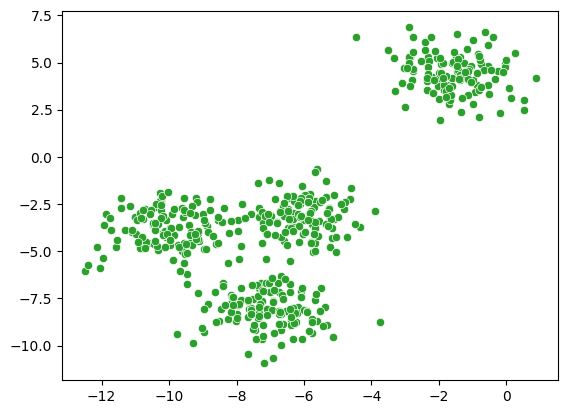

In [ ]:
sns.scatterplot(x=x[:,0], y=x[:,1], color=sns.color_palette()[y[0]])
plt.show()

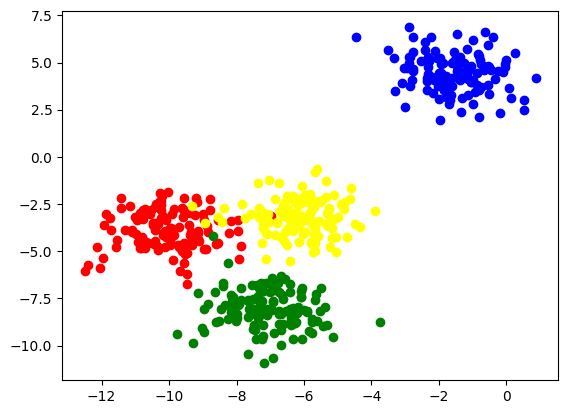

In [ ]:
plt.scatter(x[y == 0,0],x[y == 0,1],color='blue')
plt.scatter(x[y == 1,0],x[y == 1,1],color='red')
plt.scatter(x[y == 2,0],x[y == 2,1],color='green')
plt.scatter(x[y == 3,0],x[y == 3,1],color='yellow')

In [ ]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

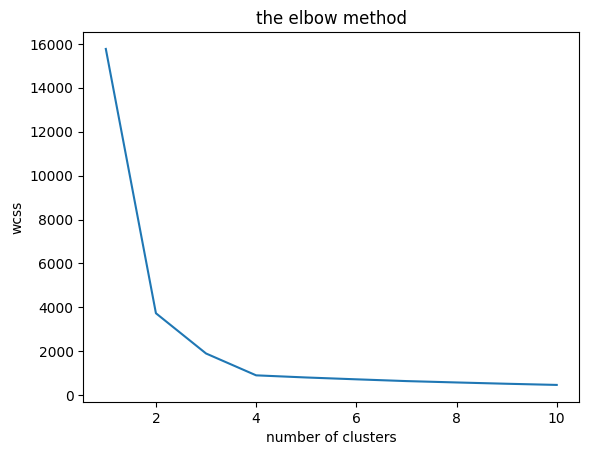

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
cluster = KMeans(n_clusters=4)
y_pred = cluster.fit_predict(x)

In [ ]:
silhouette_score(x, y_pred)

0.6505186632729437

In [ ]:
silhouette_samples(x, y_pred)

array([ 0.62903385,  0.43289576,  0.55834047,  0.82660742,  0.35213124,
        0.74123252,  0.68902347,  0.58705868,  0.04062548,  0.73241492,
        0.59363669,  0.75135825,  0.66326503,  0.81480193,  0.45066007,
        0.59477448,  0.10348453,  0.66633309,  0.84176332,  0.6089521 ,
        0.70366952,  0.66565716,  0.59626118,  0.78488729,  0.64257685,
        0.53469157,  0.86623858,  0.80913231,  0.62625573,  0.70079616,
        0.62490578,  0.83417556,  0.74035924,  0.54405603,  0.71658615,
        0.6694404 ,  0.69313134,  0.60546734,  0.58315885,  0.59179481,
        0.64472091,  0.56153618,  0.73581549,  0.50944136,  0.66243564,
        0.73163465,  0.57031198,  0.68128648,  0.85802959,  0.76946886,
        0.81915048,  0.68541025,  0.5406262 ,  0.72334031,  0.63576372,
        0.69892782,  0.64245745,  0.40251287,  0.57213237,  0.46118988,
        0.83726051,  0.80179027,  0.45393636,  0.54665199,  0.85023055,
        0.6688164 ,  0.69778864,  0.69091353,  0.68586222,  0.46

# 3D

In [ ]:
centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,Y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [ ]:
wcss = []

for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

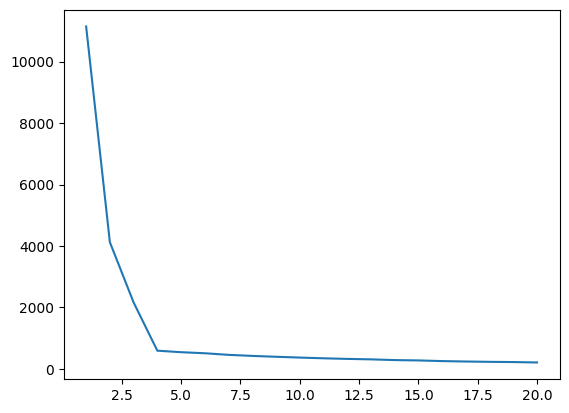

In [ ]:
plt.plot(range(1,21),wcss)
plt.show()

In [ ]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [ ]:
silhouette_score(X, y_pred)

0.7341879903476758

In [ ]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='col1', y='col2', z='col3',color='label')
fig.show()

#Hierechical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

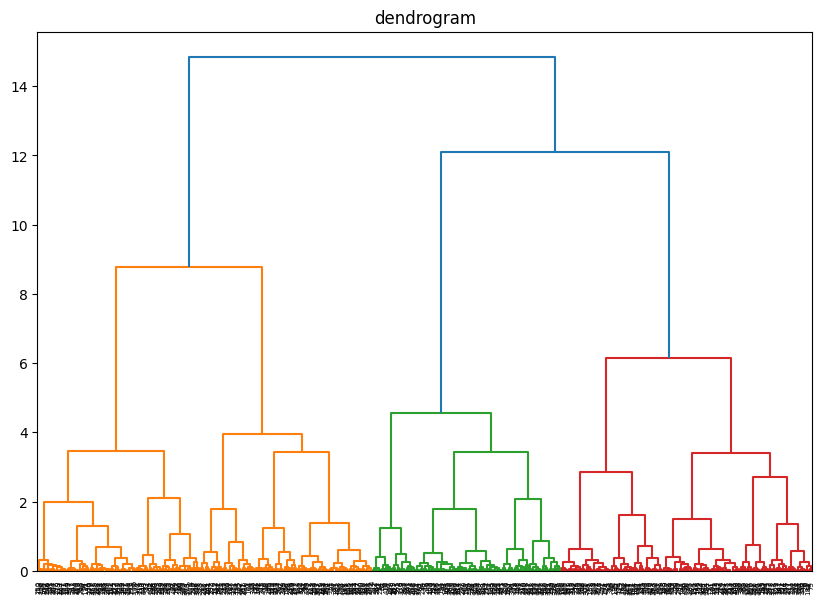

In [ ]:
plt.figure(figsize=(10,7))
plt.title('dendrogram')
dend = dendrogram(linkage(x,method='ward'))

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4)
labels_ = cluster.fit_predict(x)

In [ ]:
labels_

array([2, 1, 3, 2, 2, 3, 2, 0, 0, 0, 3, 1, 3, 0, 0, 0, 3, 3, 2, 1, 0, 1,
       1, 1, 2, 0, 0, 1, 3, 0, 2, 2, 3, 1, 1, 1, 0, 3, 0, 0, 0, 2, 0, 0,
       1, 0, 3, 0, 0, 2, 0, 1, 2, 1, 3, 1, 1, 2, 0, 3, 2, 0, 3, 1, 0, 2,
       3, 2, 2, 0, 2, 0, 2, 2, 3, 0, 0, 0, 3, 0, 3, 1, 2, 3, 0, 3, 0, 1,
       2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 3, 2, 2, 0, 3, 2, 0, 2, 0, 2, 2, 1,
       2, 3, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 0, 3, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 3, 3, 2, 1, 3,
       1, 3, 3, 2, 2, 3, 3, 2, 3, 0, 1, 0, 1, 1, 2, 0, 0, 3, 3, 0, 0, 2,
       0, 1, 1, 3, 2, 0, 0, 1, 3, 0, 1, 1, 0, 2, 3, 1, 1, 2, 3, 0, 1, 3,
       3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 2, 0, 0, 3, 2, 1, 0, 2, 1, 3,
       0, 2, 2, 3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 2, 1, 0, 3, 1, 3, 3, 0, 1,
       2, 1, 3, 1, 3, 0, 2, 0, 3, 0, 0, 1, 2, 1, 2, 3, 0, 1, 3, 2, 0, 3,
       1, 3, 2, 1, 0, 1, 3, 1, 1, 1, 2, 3, 3, 0, 2, 3, 0, 1, 3, 1, 0, 0,
       1, 0, 3, 3, 0, 2, 2, 3, 2, 0, 2, 0, 3, 2, 2,

In [ ]:
silhouette_score(x, labels_)

0.3553625166650779

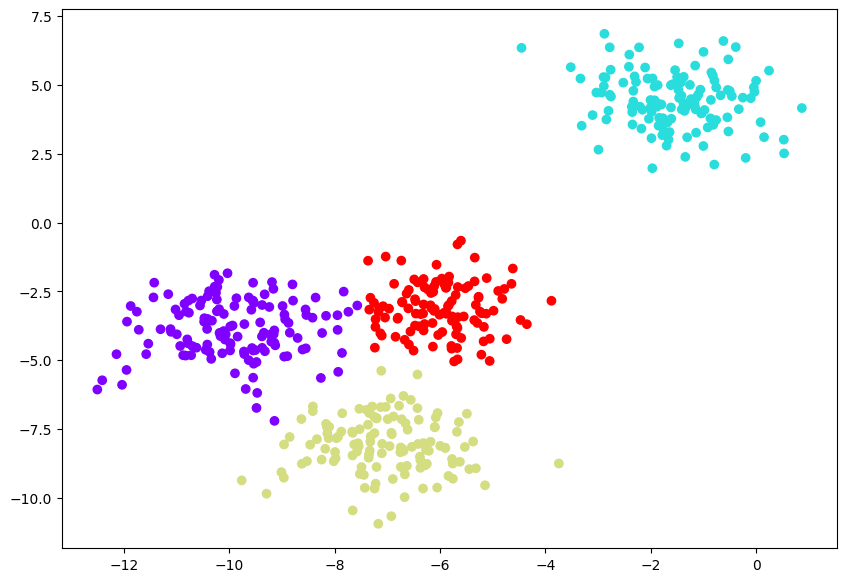

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x[:,0],x[:,1],c=cluster.labels_, cmap='rainbow')
plt.show()

# **DBSCAN**

In [ ]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

In [ ]:
# Create a concentric circle dataset
X, _ = make_circles(n_samples=500, factor=.5, noise=.03, random_state=4)

# Apply DBSCAN to the dataset
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)


In [ ]:
X, _ = make_circles(n_samples=500, noise=.03, factor=.5, random_state=4)

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels_ = dbscan.fit(X)

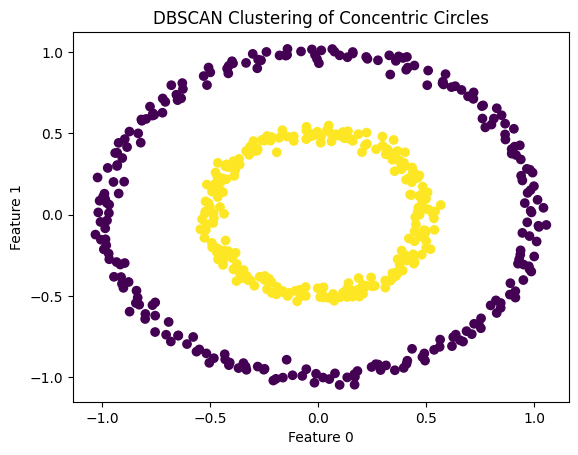

In [ ]:
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering of Concentric Circles")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [ ]:
silhouette_score(X, labels_)

0.3566796349593725